In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 03 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


With contributions totally ripped off from Phil Marshall and Adam Mantz (SLAC), and Gautham Narayan (UIUC)

# Recap

* We talked about a frequentist vs Bayesian view of the Universe 
    * frequentist confidence intervals on estimators from a sample vs.
    * Credible regions for the model (meaningless for a frequentist)
* The central role of the likelihood function to both statistical frameworks
* How incorporating prior information causes frequentists and Bayesians to disagree very fundamentally about what "truth" is

# Statistical Frameworks

Goals:

* Explore the relationship between "characterizing the posterior PDF" and "fitting a model to data."

* Understand how to derive maximum likelihood estimators and their confidence intervals

* Be able to compare, contrast and appreciate the Bayesian and Frequentist approaches to statistics

We'll work through a simple Bayesian inference (fitting a straight line and reporting summaries of marginalized posterior PDFs), and then compare with the frequentist procedure of _estimating_ the gradient and intercept and reporting confidence intervals.

# <center> We've only known our Universe is expanding for ~91 years </center>

# Proper motion gives us distances to stars in our own Galaxy from geometry
<center> <img src="./figures/proper_motion.png" width="20%"></center>

You've already seen that stars in our galaxy have different proper motions in homework 01.

## <center> You've also seen that we can measure the brightness of stars (HW 2) </center>

## All stars vary if you look long enough. Some actually pulsate.

<img src='./figures/rspuppis.gif'>

<img src="./figures/hubble_mtwilson.jpg" width="50%">

<img src="./figures/HubbleCepheid.jpg">

<img src="./figures/hubblenotebk.jpg">

## The period-magnitude relation in Cepheid stars

* Cepheids are stars whose brightness oscillates with a stable period the logarithm of which appears to be strongly correlated with their mean luminosity (or absolute magnitude).
<img width="512" src="./figures/Cepheid-variabledb92-600x461.jpg">

## Why does this make them useful

* A lot of _monitoring_ data - repeated imaging and subsequent "photometry" (which you did in homework 2) of the star - can provide a measurement of the period of the oscillation and their apparent magnitudes

* If you can do this in our Galaxy, you can compare apparent magnitudes to distances from parallax and find a relation - this relation involves the period of the Cepehids. You can therefore define some mean corrected apparent magnitude and together with the distance, you can derive an *absolute magnitude*

* If you measure Cepehids in other galaxies (too far away for parallax distances) then you can assert that those Cepheids are the same as the ones in our Galaxy and therefore have the same absolute magnitude - so now you can get the distances to those galaxies

<img src="./figures/hubble_diagram.jpg" width="80%">

<img src="./figures/hubblefindsu.jpg">

<img src="./figures/distance_ladder.jpg">

* Let's look at some Cepheid measurements reported by [Riess et al (2011, R11)](https://arxiv.org/abs/1103.2976).  The data are in the form of datapoints, one for each star.

* The periods are well measured (how??? we'll get there!), while the magnitudes come with reported error bars.

<img src="./figures/cepheid_data.png" width=100%>

## The model, and the data

* Let's assume that Cepheid stars' luminosities are related to their oscillation periods by a power law, such that their apparent magnitude and log period follow the linear relation

$\;\;\;\;\;\;\;m = a\;\log_{10} P + b$

* The data consist of *observed magnitudes with quoted uncertainties*, such as: 

$\;\;\;\;\;\;\;m^{\rm obs} = 24.51 \pm 0.31$ at $\log_{10} P = \log_{10} (13.0/{\rm days})$

## Bayesian inference

* We compute the posterior PDF for the parameters $a$ and $b$ given the data and the assumed model $H$: 

$\;\;\;\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H)\;P(a,b|H)$

* We can evaluate the unnormalized posterior PDF on a grid, renormalize it numerically, and then visualize and summarize the resulting 2D function.

## Probabilistic graphical model

* A probabilistic graphical model is a way of representing how we build the model of the data

* Let's draw a PGM for this inverse problem, imagining our way through what we would do to generate a mock dataset like the one we have from R11.

* If we were generating mock data, then for any plausible choice of parameters $a$ and $b$ we can predict the true magnitude $m_k$ of each star given its period $P_k$, and then add noise to simulate each observed magnitude $m^{\rm obs}_k$.


## PGM

<img width="400" src="./figures/pgms_cepheids.png"/>

> NB. The magnitude uncertainties $\sigma^{\rm obs}$ are given to us in the data file; we can use them as-is if we believe them. The "true" magnitudes $m$ are _determined_ by our power law model.

## Building an inference

Now let's assign PDFs for each node in the PGM, and derive the unnormalized posterior PDF for $a$ and $b$.

We'll need:

* The sampling distribution: $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

* The conditional PDF for the latent variables $m_k$, $P(m_k|a,b,\log_{10}{P_k},H)$

* A prior PDF for our parameters: $P(a,b|H)$

## The sampling distribution $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

We were given points ($m^{\rm obs}_k$) with error bars ($\sigma_k$), which suggests a *Gaussian* sampling distribution for each one:

$\;\;\;\;\;\;\;P(m^{\rm obs}_k|m_k,\sigma_k,H) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp{-\frac{(m^{\rm obs}_k - m_k)^2}{2\sigma_k^2}}$

> Note that we are never _given_ the form of the sampling distribution: it always has to be assumed. 

> A Gaussian will turn out to be a good choice in a number of cases where the problem has some true "variance" or dispersion ($\sigma$) - even if you don't know what that is, because of a principle called maximum entropy. This sort of setting is common in the real world (see the Central Limit Theorem) and maximizing the entropy minimized the amount of prior information built into the posterior distribution.

If we assume that the measurements of each Cepheid start are *independent* of each other, then we can define *predicted and observed data "vectors"* $\boldsymbol{m}$ and $\boldsymbol{m}^{\rm obs}$ (plus a corresponding observational uncertainty "vector" $\boldsymbol{\sigma}$) and compute the joint sampling distribution as:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\boldsymbol{\sigma},H) = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)$

## The conditional PDF $P(m_k|a,b,\log_{10}{P_k},H)$ 

Our relationship between the intrinsic magnitude and the log period is linear and _deterministic_, indicating the following *delta-function* PDF:

$\;\;\;\;\;\;\;P(m_k|a,b,\log_{10}{P_k},H) = \delta(m_k - a\log_{10}{P_k} - b)$

<img width="300" src="./figures/pgms_cepheids.png"/>

## The resulting joint likelihood, $\mathcal{L}(a,b;\boldsymbol{m}^{\rm obs}) = P(\boldsymbol{m}^{\rm obs}|a,b,H)$

The PDF for everything inside the PGM plate is the following product:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b)$

## Marginalizing out the latent variables

The intrinsic magnitudes of each Cepheid $m_k$ are "latent variables," to be _marginalized out_:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|a,b,H) = \int P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)\; d\boldsymbol{m}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k \int P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b) dm_k$

$\;\;\;\;\;\;\; \longrightarrow P(\boldsymbol{m}^{\rm obs}|a,b,H) = \prod_k P(\boldsymbol{m}^{\rm obs}_k|(a\log{P_k} + b),\sigma_k,H)$

## The log likelihood

Taking logs, for numerical stability, the product in the joint likelihood becomes the following sum:

$\;\;\;\;\;\;\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = \sum_k \log P(m^{\rm obs}_k|(a\log{P_k} + b),\sigma,H)$

which, substituting in our Gaussian form, gives us: 

$\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

> Note that the log likelihood $\log P(\boldsymbol{m}^{\rm obs}|a,b,H)$ is a function, $\log \mathcal{L}(a,b;\boldsymbol{m}^{\rm obs})$ that can be evaluated, as a function of $a$ and $b$, at constant $\boldsymbol{m}^{\rm obs}$

## The Chi-squared misfit statistic

Astronomers often call the term in the log likelihood that depends on the parameters $\chi^2$ ("chi-squared"):

$\;\;\;\;\;\;\;\chi^2 = \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

$\chi^2$ is a "misfit" statistic, that quantifies the difference between "observed and predicted data." Under our assumptions, it's equal to -2 times the log likelihood (up to a constant). The "predicted data" are $m_k = a\log{P_k} - b$

## Including the prior $P(a,b|H)$

* Let's assume  the prior PDFs for $a$ and $b$ to be independent, such that $P(a,b|H) = P(a|H)P(b|H)$.

* For now, let's assume uniform prior PDFs for both $a$ and $b$, supposing that we know roughly what size they are:

$\;\;\;\;\;\;\;P(a|H) = \frac{1}{a_{\rm max} - a_{\rm min}}$ with $(a_{\rm min}, a_{\rm max}) = (-10, 10)$

$\;\;\;\;\;\;\;P(b|H) = \frac{1}{b_{\rm max} - b_{\rm min}}$ with $(b_{\rm min}, b_{\rm max}) = (10, 30)$

* This is literally what you've been doing by evaluating on a grid of points

## Putting it all together

The joint PDF is:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs},a,b|H) = P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

> Since we marginalized out the $m$, analytically, we _could_ have drawn the PGM more simply, jumping directly to $P(\boldsymbol{m}^{\rm obs}|a,b,H)$. However, it's often helpful to _explicitly_ distinguish between "true" parameters and latent ones.

## Characterizing the posterior PDF

With the completed factorization of the joint PDF for all variables, we have the following product: 

$\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

We can evaluate the posterior PDF $P(a,b|\boldsymbol{m}^{\rm obs},H)$ for any choice of parameters $(a,b)$, up to a normalization constant.

## Posterior Evaluation on a Grid

* Our 2-D posterior PDF can be visualized as a contour plot

* We can choose contours that display the _credible regions_ that enclose 68% and 95% of the posterior probability.

* _Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95._

<img src="./figures/cepheids_2d-posterior.png" width=60%>

## Summarizing our inferences

* Typically, we will want to (or will be expected to) report "answers" for our model parameters

* This can be difficult: our result _is_ the posterior PDF for the model parameters given the data!

* A convenient, and in this case appropriate, choice is to report quantiles of the 1D marginalized PDFs

> In general, the most important thing when summarizing inferences is to state clearly what you are doing, preferably with critical commentary

## 1D marginalized posterior PDFs

<img src="./figures/cepheids_1d-posteriors.png">

Let's define the 68% credible interval as the range between the 16th and 84th percentile, and quote it as an (asymmetric) "error bar" on the 1-D posterior medians:

$a = -2.95^{+0.06}_{-0.06} \;\;\;\;\;\;\; b =  26.27^{+0.09}_{-0.1} $

## Notes on summaries of marginal PDFs 

* In this simple case, our report makes sense: the medians of both 1D marginalized PDFs lie within the region of high 2D posterior PDF. *This will not always be the case.*


* The marginalized 1-D posterior for $x$ has a well-defined meaning, regardless of the higher dimensional structure of the joint posterior:  it is $P(x|d,H)$, the PDF for $x$ given the data and the model, and *accounting for the uncertainty in all other parameters*.


* The posterior PDF we computed is close to, but not quite, a bivariate Gaussian. 

**Question: What choice of (proper) prior would we have had to make in order for the posterior PDF to be _exactly_ Gaussian?**

## Post-inference model checking


It's always a good idea to check that the inferred parameter values are sensible: look at the model predictions in data space.

$\longrightarrow$ Let's overlay the model period-magnitude relation defined by the 1-D posterior median parameter values on the data.

<img src="./figures/cepheids_posterior-median-check.png">

## "Fitting the data"

* The Bayesian solution is not a single set of "best-fit" parameters. 

* We can think of the posterior PDF as providing us with a continuous distribution of model fits that are _plausible_ given the data and our assumptions.

* There are other ways of defining the parameters that _best fit_ the data: the primary one is "the method of Maximum Likelihood"

## Computing the Bayesian Posterior PDF

Here's how the figures for the Bayesian inference were made - starting with the functions for the log likelihood, the log prior, and the unnormalized log posterior, evaluated on a 2D $(a,b)$ parameter grid given the R11 data.

In [2]:
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

def log_likelihood(logP, mobs, sigma, a, b):
    # YOUR CODE HERE
    l = -0.5*np.sum(np.log(2*np.pi*np.power(sigma,2)))-0.5* np.sum(np.power(mobs-a*logP-b,2)/np.power(sigma,2))
    return l

def log_prior(a, b):

    amin,amax = -10.0,10.0
    bmin,bmax = 10.0,30.0

    # YOUR CODE HERE
    # prior is: 1 if bmin < b < bmax, 0 otherwise
    # prior is: 1 if amin < a < amax, 0 otherwise
    # remember to take a log...
    if amin < a and a < amax and bmin < b and b < bmax:
        value = 1
    else:
        value = 0
    
    # if done, also try Cauchy distribution for b, equivalent to uniform
    # in angle of orientation of line
    #value = np.log(1.0/(bmax-bmin)) - np.log(np.pi) - np.log(1 + a**2)
    
    return np.log(value)

def log_posterior(logP, mobs, sigma, a, b):
    return log_likelihood(logP,mobs,sigma,a,b) + log_prior(a,b)

## Evaluating the posterior PDF

Now, let's set up a suitable parameter grid, evaluate the unnormalized log posterior on it, and then renormalize it numerically.

In [3]:
# Limits of parameter grids, focused on the high likelihood region:
amin, amax = -3.4, -2.4
bmin, bmax = 25.7, 26.8
limits = (amin, amax, bmin, bmax)

def evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100):
    
    # Make grids:
    amin, amax, bmin, bmax = limits
    agrid, bgrid, logprob = np.linspace(amin,amax,npix), np.linspace(bmin,bmax,npix), np.zeros([npix,npix])
    data.select(NGC_ID)

    # Loop over parameters, computing unnormlized log posterior PDF:
    for i,a in enumerate(agrid):
        for j,b in enumerate(bgrid):
            logprob[j,i] = log_posterior(data.logP, data.mobs, data.sigma, a, b)

    # Exponentiate and normalize to get posterior density:
    # YOUR CODE HERE
    prob = np.exp(logprob)
    prob = prob/np.sum(prob) # not sure if normalization is right
    
    return prob, agrid, bgrid

In [4]:
%%time
prob, a, b = evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100)

CPU times: user 603 ms, sys: 0 ns, total: 603 ms
Wall time: 600 ms


## Visualizing the 2D PDF

* Typically we want to be able to see the centroid, size and shape of the posterior PDF

* In particular we want to see the _credible regions_ that enclose 68% and 95% of the posterior probability. These are best plotted as contours

* Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95

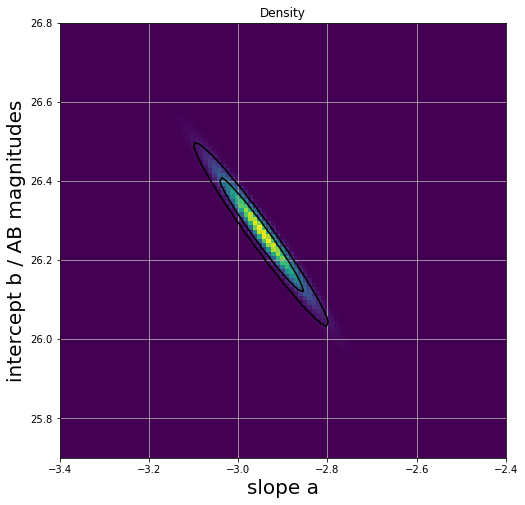

In [5]:
sorted = np.sort(prob.flatten())
C = sorted.cumsum()

# YOUR CODE HERE (returning prob of the grid)

#print(prob, np.sum(prob))
#plt.plot(prob)
#plt.show()

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, title='Density',xlabel="g-i",ylabel='r')
ax1.pcolormesh(a,b,prob)
#ax1.contour(a,b,prob, colors=['white'])
# Find the pixel values that lie at the levels that contain 68% and 95% of the probability:

# Find the pixel values that lie at the levels that contain 68% and 95% of the probability:
lvl68 = np.min(sorted[C > (1.0 - 0.68)])
lvl95 = np.min(sorted[C > (1.0 - 0.95)])

#plt.figure(figsize=(10,10))
#plt.imshow(prob, origin='lower', cmap='Blues', interpolation='none', extent=limits)
plt.contour(prob,[lvl95,lvl68],colors='black',extent=limits)
plt.grid()
plt.xlabel('slope a', fontsize=20)
plt.ylabel('intercept b / AB magnitudes', fontsize=20);

# Plot the 2D likelihood surface

## Summarizing our inferences

Let's compute the 1D marginalized posterior PDFs for $a$ and for $b$, and report the median and "68% credible interval" (defined as the region of 1D parameter space enclosing 68% of the posterior probability).

a =  $ -2.95^{+0.06}_{-0.06} $
b =  $ 26.27^{+0.09}_{-0.1} $


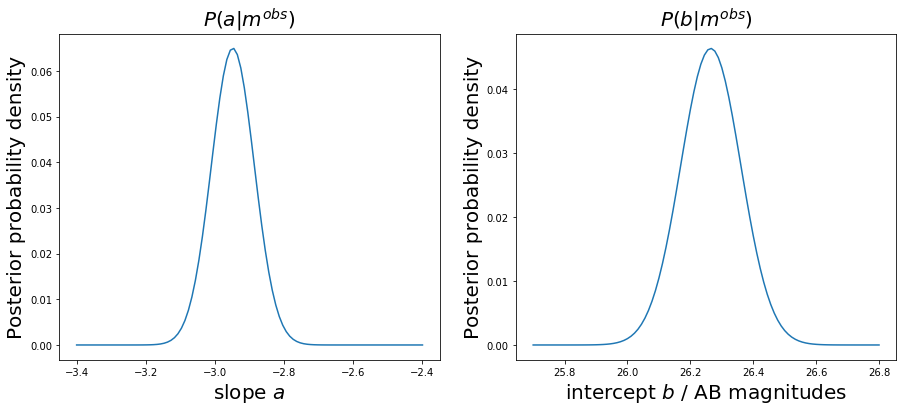

In [6]:
# YOUR CODE HERE
prob_a_given_data = np.sum(prob, axis=0) # Approximate the integral as a sum
prob_b_given_data = np.sum(prob, axis=1) # Approximate the integral as a sum

# Check that we do have a 1D PDF:
# print(prob_a_given_data.shape, np.sum(prob_a_given_data))

plot_1d_marginalized_pdfs(a=a, b=b, prob_a_given_data, prob_b_given_data)


# plt.savefig("cepheids_1d-posteriors.png")

print("a = ",compress_1D_pdf(a, prob_a_given_data, ci=68, dp=2))
print("b = ",compress_1D_pdf(b, prob_b_given_data, ci=68, dp=2))

## Post-inference model checking


Are these inferred parameters sensible? 

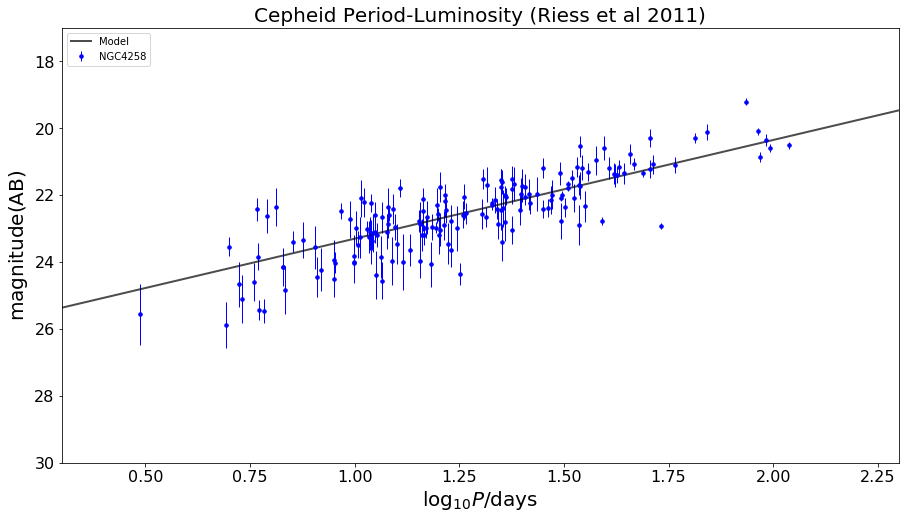

In [12]:
# YOUR CODE HERE

data.plot(4258)

data.overlay_straight_line_with(a=-2.95, b=26.25, label='Model')

data.add_legend()

# plt.savefig("cepheids_posterior-median-check.png")

## Appendix: Finding the Maximum likelihood parameters

Here's the code to find the maximum likelihood parameters in the Cepheid problem.

In [13]:
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

In [14]:
data.select(4258)
M, v = data.sufficient_statistics()
a, b = np.linalg.solve(M, v)
print('$ \hat{a} = %.2f $' % np.round(a, 2))
print('$ \hat{b} = %.2f $' % np.round(b, 2))

$ \hat{a} = -2.95 $
$ \hat{b} = 26.26 $


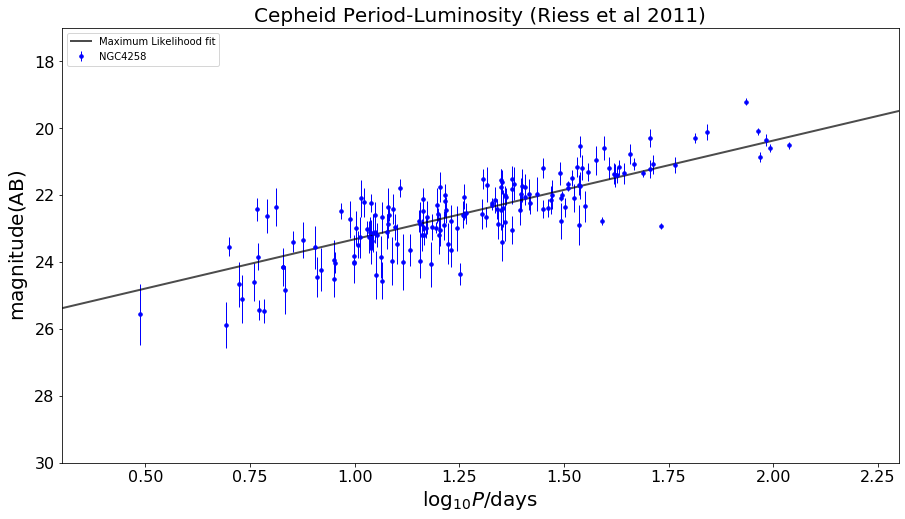

In [15]:
data.plot(4258)

data.overlay_straight_line_with(a=a, b=b, label='Maximum Likelihood fit')

data.add_legend()

## The covariance of MLEs

Here's code to compute the inverse Hessian of the log likelihood, and hence a lower limit on the covariance of the ML estimators. The diagonal elements of the covariance matrix give an approximate symmetrical error bar.

In [16]:
# Generalized maximum likelihood approach:

import scipy.optimize

pars = np.array([0.0, 20])
result = scipy.optimize.minimize(data.negative_log_likelihood, pars, method='BFGS', tol=0.001)

print(result)

      fun: 544.3090872704098
 hess_inv: array([[ 0.00384455, -0.0057908 ],
       [-0.0057908 ,  0.00913226]])
      jac: array([-2.28881836e-05,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-2.94832742, 26.26490174])


In [17]:
C = result.hess_inv
np.sqrt(C[0,0]), np.sqrt(C[1,1])

(0.062004474536004654, 0.09556286243161158)

# Bayesian vs. Frequentist

## Maximum likelihood

* Instead of asking for the posterior probability for the parameters given the data, $P(a,b|\boldsymbol{m}^{\rm obs},H)$, we could find the parameters that maximize the probability of getting the data: $P(\boldsymbol{m}^{\rm obs}|a,b,H)$

  > In astronomy, "best fit" often (but not always) means "maximum likelihood"

* Where does the emphasis on the likelihood, rather than the posterior come from?

## Frequentism

* In the frequentist school of statistics, parameters do not have probability distributions. Probability can only be used to describe _frequencies_, not _degrees of belief_ (or odds). 

* In the frequentist view, it's only the data that can be modeled as having been drawn from a probability distribution, because we can imagine doing the experiment or observation multiple times, and building up a _frequency_ distribution of results.

* This PDF over datasets is the sampling distribution, e.g. $P(\boldsymbol{m}^{\rm obs}|a,b,H)$

* Given an assumed model, the frequentist view is that there is only one set of parameters, the true ones, and our job is to _estimate_ them.

* Derivation of good estimators is a major activity in frequentist statistics, and has led to some powerful mathematical results and fast computational shortcuts - _some of which are useful in Bayesian inference too_


## The Likelihood Principle

* The _likelihood principle_ holds that all of the information in the data that is relevant to the model parameters is contained in the likelihood function $\mathcal{L}(a,b;\boldsymbol{m}^{\rm obs}) = P(\boldsymbol{m}^{\rm obs}|a,b,H)$

> This was evident in our Bayesian treatment, PGMs etc too: Frequentists and Bayesians are in full agreement about the importance of the likelihood function!

* As a result of this focus, Maximum Likelihood estimators (MLEs) have some good properties

## Maximum likelihood estimators

* **Consistency:** as more data are taken, the MLE tends towards the true parameter value if the model is correct. 

> MLEs can be "biased" but this bias goes to zero as $N_{\rm data} \rightarrow \infty$ 

* **Efficiency:** among estimators, MLEs have the minimum variance when sampled over datasets

* **Asymptotic Normality:** as the dataset size increases, the distribution of MLEs over datasets tends to a Gaussian centred at the true parameter value.

> The covariance of this ultimate Gaussian distribution is the inverse of the "Fisher information matrix"

* In our Cepheid straight line fit, we can derive MLEs for our parameters by finding the maximum (log) likelihood parameters analytically

$\;\;\;\;\;\;\;\log L(a,b) = \log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

* That is, we need to find the parameters $(\hat{a}, \hat{b})$ that give

$\;\;\;\;\;\;\; -2 \nabla \log L(a,b) = \nabla\,\chi^2$ = 0

> NB: Maximizing a Gaussian likelihood is equivalent to minimizing $\chi^2$ - and gives a "weighted least squares" fit

The result in this case is a pair of equations that we can solve for the best-fit parameters $(\hat{a}, \hat{b})$, that give the smallest misfit between observed and model-predicted data

Writing $x = \log{P}$ and $y = m^{\rm obs}$, we have

$\frac{\partial \log L}{\partial a}\Bigr|_{\hat{a},\hat{b}} =  \sum_k \frac{x_k(y_k - \hat{a}x_k - \hat{b})}{\sigma_k^2} = 0 \longrightarrow   \hat{a} \sum_k \frac{x_k^2}{\sigma_k^2} + \hat{b} \sum_k \frac{x_k}{\sigma_k^2} = \sum_k \frac{x_k y_k}{\sigma_k^2}$

$\frac{\partial \log L}{\partial b}\Bigr|_{\hat{a},\hat{b}} =  \sum_k \frac{(y_k - \hat{a}x_k - \hat{b})}{\sigma_k^2} = 0 \longrightarrow \hat{a} \sum_k \frac{x_k}{\sigma_k^2} + \hat{b} \sum_k \frac{1}{\sigma_k^2} = \sum_k \frac{y_k}{\sigma_k^2}$

This set of linear equations can be solved straightforwardly to find the _estimators_ $\hat{a}$ and $\hat{b}$:

$\begin{pmatrix} S_{xx} & S_{x} \\ S_x & S_0 \end{pmatrix} \begin{pmatrix} \hat{a} & \hat{b} \end{pmatrix} = \begin{pmatrix} S_{xy} \\ S_{y} \end{pmatrix}$

> All the information in the data that is needed to find the best-fit parameters $\boldsymbol{\hat{\theta}}$ is contained in a set of so-called **sufficient statistics** $S_{xx}$, $S_y$ etc. This is a common feature of maximum likelihod estimators

Computing and combining the sufficient statistics, the maximum likelihood estmimators are as follows:

$ \hat{a} = -2.95 $

$ \hat{b} = 26.26 $

**Questions: Why do you think the MLE $\hat{b}$ not exactly the same as the posterior median value for $b$?**

**Under what circumstances might $\hat{b}$ or $\hat{a}$ be _very_ different from the posterior medians?**

## Distributions of estimators

* In frequentism, we think of the estimators having distributions, since each dataset that we imagine being drawn from the sampling distribution will produce one estimator. An ensemble of (hypothetical) datasets leads to a (hypothetical) distribution of estimators

* One straightforward approximate way to estimate these distributions is to use the asymptotic normality property of MLEs, and associate a _Gaussian approximation to the likelihood_ with the Gaussian distribution for the MLEs we expect to see when averaging over datasets

## The distribution of the log likelihood

* An estimator can be thought of as a _summary_ of the data, and so can the value of the value of the log likelihood evaluated at the estimators. 

* The distribution of the log likelihood itself over the hypothetical ensemble of datasets provides a route to a _confidence interval._

* In our simple Gaussian likelihood example, and also in the large dataset limit, twice the negative log likelihood (our $\chi^2$ statistic) follows a $\chi^2$ distribution with the same number of degrees of freedom as the dimensionality of the parameter space. Integrating this distribution from 0 to some boundary $\Delta \chi^2_{D}$ defines a confidence region in parameter space.

## Confidence regions from $\chi^2$ distributions

* For example: in 1D, the 68.3% confidence region is bounded by the contour at $\chi^2_{\rm min} + \Delta \chi^2_{D}$ where $\Delta \chi^2_{D} = 1$ in 1D, and $\Delta \chi^2_{D} = 2.30$ in 2D. 

* In the 1D case, the boundary of the 68.3% confidence interval lies 1 standard deviation (or "1-sigma") from the mean, while the 95.4% CI lies 2-sigma from the mean.

> Remember, general, $\Delta \chi^2_{D}$ can be computed from the $\chi^2$ distribution quantile (or "percentage point") function, e.g.  `scipy.stats.chi2.ppf(0.683, D)`

In [18]:
import scipy.stats, numpy as np

dimensions = 2
level = 0.683
dchisq = scipy.stats.chi2.ppf(level, dimensions)

np.round(dchisq,2)

2.3

* In our example, we have that:

### $\;\;\;\;\;\chi^2 = (\boldsymbol{\hat{\theta}} - \boldsymbol{\theta})^T (\mathcal{M}^T C^{-1} \mathcal{M})^{-1} (\boldsymbol{\hat{\theta}} - \boldsymbol{\theta})$, 

$\;\;\;\;\;$where $C$ is the covariance matrix of the data (i.e. $C$ is diagonal, with elements equal to the squared uncertainties on each datapoint) and $\mathcal{M}$ is the 2xN _design matrix_ that predicts data given parameters via   $\mathcal{M}\boldsymbol{\theta} = \boldsymbol{m}$.

* This $\chi^2$ function can be computed on a grid, and visualized as a contour plot: the contour at $\chi^2_{\rm min} + 2.30$ will enclose the 68% 2-D confidence region.

## Approximate uncertainties

* In general, the covariance matrix of a Gaussian approximation to the likelihood can be calculated by _taking second derivatives of the log likelihood at the peak_, and inverting the resulting _Hessian_ matrix. 

* This gives a lower limit to the covariance of a set of estimators: 

## $\;\;\;\;\;V^{-1}_{ij} \geq -\frac{\partial^2 \log{L}}{\partial\theta_i\partial\theta_j} \biggr|_{\boldsymbol{\hat{\theta}}}$

> $V$ is what [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html) returns in its `hess_inv` field if you pass it the negative log likelihood.

## Coping with multiple dimensions

In Frequentism there is no concept of marginalization: parameters are assumed to be single-valued and fixed, and the only probability distribution considered is _P(data|pars)_, not _P(pars|data)_.

Instead, 1D confidence intervals are usually derived by _maximizing the likelihood_ over the other parameters, in a _profile likelihood_ analysis. The repeated optimizations involved can be computationally expensive.

## Wording

* In general, Frequentist confidence intervals are different from Bayesian credible regions:

> "68% of datasets would give a 68% frequentist confidence interval that contains the true parameter value"

> "The probability of the true parameter value lying within the 68% Bayesian credible region is 68%"

* The difference in wording comes from the different ways that probability is used in the two approaches.

## Uncertainties in the estimators

* The covariance matrix of a Gaussian approximation to the likelihood defines a 1-sigma, 2D, elliptical, _frequentist confidence region_

* Since this came from transforming the sampling distribution, which is a PDF over datasets, the confidence interval enables conclusions in terms of fractions of an ensemble of (hypothetical) datasets

* The 68% confidence interval is the range of estimators that we expect to contain the true parameter value in 68% of the (hypothetical) datasets observed

## Frequentism and Bayesianism

* In Frequentism, the data are considered to be random variables (in large sets of hypothetical trials described with probability distributions) while parameters are considered fixed (and to be estimated)

* In Bayesianism, the data are considered to be fixed (as constants, in datafiles) while parameters are considered random variables (to be inferred, with uncertainty described by probability distributions)

Given an assumed model:

* Frequentists seek to _transform_ the frequency distribution of the data into a frequency distribution of their estimators, and hence quantify their uncertainty in terms of _what they expect would happen if the observation were to be repeated_  
  
* Bayesians seek to _update their knowledge_ of their model parameters, and hence quantify their uncertainty in terms of _what might have been had the observation been different_, and _what they knew before the data were taken_

## Frequentism vs. Bayesianism


* "You have to assume a prior" cf. "You get to assume a prior"

* "Your calculations are computationally expensive"

* "How do you account for your nuisance parameters?"

* "Your conclusions are not relevant"

## Things to remember

* The most important thing is to _know what you are doing_, and to _communicate that clearly to others_: both approaches involve assumptions which must be recorded and tested

* The Bayesian approach provides a logical framework for combining datasets and additional information, and provides answers in terms of the probability distribution for the model parameters

* The Frequentist approach provides a way of studying the model independent of additional information beyond the dataset in hand, and provides answers in terms of the probability of getting the data

## Endnote

* The astronomy literature contains a mixture of frequentist and Bayesian analysis, sometimes within the same paper

* Frequentist estimators often make good _summary statistics_ with well understood sampling distributions: astronomical catalogs are full of them

* In most of this course we follow the Bayesian approach: Bayes' Theorem gives you a framework for deriving the solution to _any_ inference problem you encounter.  Having said that, we'll keep our eyes open.